In [34]:
import json

def corregir_dias_geojson(geojson_file, nuevo_geojson_file):
    with open(geojson_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
        
    temp_features = []
    for feature in data['features']:
        dias = feature['properties']['DÍA']
        if ',' in dias or 'Y' in dias:
            dias = dias.replace('Y', ',').split(',')
            dias = [dia.strip() for dia in dias]
            for dia in dias:
                # Crear un nuevo objeto para cada día y agregarlo directamente a la lista
                new_feature = {
                    "type": "Feature",
                    "properties": feature['properties'].copy(),
                    "geometry": feature['geometry']
                }
                new_feature['properties']['DÍA'] = dia
                temp_features.append(new_feature)
        else:
            temp_features.append(feature)
    
    # Fusionar todas las características en el resultado final
    new_geojson = {
        "type": "FeatureCollection",
        "features": temp_features
    }
    
    # Guardar el nuevo archivo GeoJSON con extensión .geojson
    with open(nuevo_geojson_file, 'w', encoding='utf-8') as f:
        json.dump(new_geojson, f)

# Ejemplo de uso
corregir_dias_geojson("C:/Users/Brandon/Desktop/ubicacin-de-tianguis.json", "C:/Users/Brandon/Desktop/ubicacin-de-tianguis2.geojson")

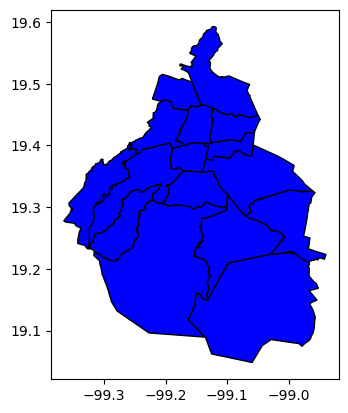

In [35]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests

# URL para obtener el JSON de la clave 01
url = "https://gaia.inegi.org.mx/wscatgeo/geo/mgem/09"

# Realizar la solicitud HTTP
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    try:
        # Obtener el diccionario JSON
        json_data = response.json() 
        # Construir un GeoDataFrame desde el JSON
        gdf = gpd.GeoDataFrame.from_features(json_data['features'])
        # Crear una figura y ejes
        fig, ax = plt.subplots()
        # Mapear el GeoDataFrame
        gdf.plot(ax=ax, color='blue', edgecolor='black')
        # Mostrar el mapa
        plt.show()
        
    except Exception as e:
        print("Error al cargar los datos:", e)
else:
    print("Error al obtener el JSON. Código de estado:", response.status_code)


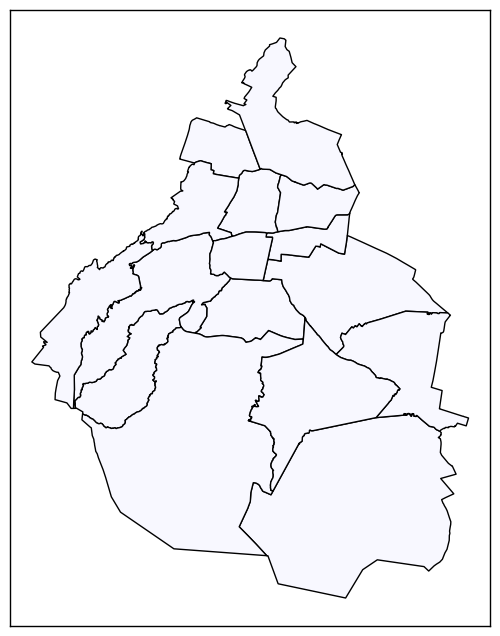

In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests

url = "https://gaia.inegi.org.mx/wscatgeo/geo/mgem/09"
response = requests.get(url)
# Obtener el diccionario JSON
json_data = response.json() 
# Construir un GeoDataFrame desde el JSON
gdf = gpd.GeoDataFrame.from_features(json_data['features'])

# Crear una figura y ejes con un tamaño más grande
fig, ax = plt.subplots(figsize=(10, 8))  # Tamaño de la figura en pulgadas (ancho, alto)

# Mapear el GeoDataFrame con el color deseado, tipo de línea doble y borde negro
gdf.plot(ax=ax, color='#F8F8FF', linestyle='-', edgecolor='black')  # Línea doble con borde negro

# Configurar los spines para que sean visibles y de color negro con un ancho de línea de 2 puntos
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

# Eliminar las etiquetas de los ejes
ax.set_xticks([])
ax.set_yticks([])

# Mostrar el mapa
plt.show()




In [37]:
# Ruta al archivo GeoJSON
file_path = "C:/Users/Brandon/Desktop/ubicacin-de-tianguis2.geojson"

# Leer el archivo GeoJSON en un GeoDataFrame
tianguis = gpd.read_file(file_path)
tianguis.head()

,CONS,ID_SUB_NOR,ESTADO,ALCALDÍA,NOMBRE_COL,COORD_UTM_,COORD_UTM1,GIRO,DÍA,HORARIO,UBIC_,NUM_OFER_1,geometry
0,1.0,1.0,CDMX,ÁLVARO OBREGÓN,PRESIDENTES,476724.342400,2.142404e+06,None,LUNES,08:00:00,ADOLFO DE LA HUERTA ENTRE RUIZ CORTINEZ Y BENI...,263.0,POINT (-99.22165 19.37561)
1,2.0,2.0,CDMX,ÁLVARO OBREGÓN,REACOMODO EL CUERNITO,478040.630043,2.143012e+06,None,LUNES,08:00:00,AV. CHICAGO ENTRE URANO Y JUPITER,42.0,POINT (-99.20912 19.38112)
2,3.0,3.0,CDMX,ÁLVARO OBREGÓN,COVE,479217.408485,2.144976e+06,None,LUNES,08:00:00,PONIENTE 85 Y AV. OBSERVATORIO,14.0,POINT (-99.19794 19.39889)
3,4.0,4.0,CDMX,ÁLVARO OBREGÓN,BALCONES DE CEHUAYO,474780.545764,2.140211e+06,None,LUNES,08:00:00,CALLE LAS TORRES Y ANTONIO MACHADO,36.0,POINT (-99.24013 19.35577)
4,5.0,5.0,CDMX,ÁLVARO OBREGÓN,MARTIRES DE TACUBAYA,477637.321018,2.143549e+06,None,LUNES,08:00:00,AV. MEXICANOS ENT. BRASILEÃ‘OS Y URUGUAYOS,138.0,POINT (-99.21297 19.38597)


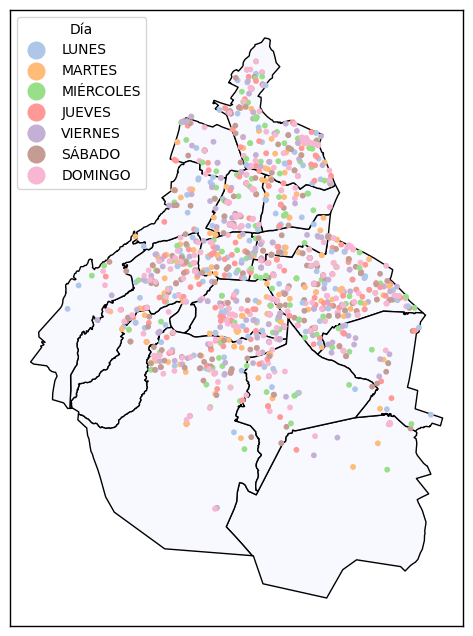

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
# Ruta al archivo GeoJSON
file_path = "C:/Users/Brandon/Desktop/ubicacin-de-tianguis2.geojson"

# Leer el archivo GeoJSON en un GeoDataFrame
tianguis = gpd.read_file(file_path)
# Reemplazar el valor incorrecto en la columna 'DÍA'
tianguis['DÍA'] = tianguis['DÍA'].str.replace('SÀBADO', 'SÁBADO')
# Cargar el mapa de la entidad con código "09"
url = "https://gaia.inegi.org.mx/wscatgeo/geo/mgem/09"
response = requests.get(url)
# Obtener el diccionario JSON
json_data = response.json() 
# Construir un GeoDataFrame desde el JSON
gdf_entidad = gpd.GeoDataFrame.from_features(json_data['features'])

# Crear una figura y ejes con un tamaño más grande
fig, ax = plt.subplots(figsize=(10, 8))  # Tamaño de la figura en pulgadas (ancho, alto)

# Mapear el GeoDataFrame de la entidad con color y estilo deseados
gdf_entidad.plot(ax=ax, color='#F8F8FF', linestyle='-', edgecolor='black')  # Línea doble con borde negro

# Configurar los spines para que sean visibles y de color negro con un ancho de línea de 1 punto
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

# Eliminar las etiquetas de los ejes
ax.set_xticks([])
ax.set_yticks([])
# Crear un diccionario de mapeo de colores para cada día único
colores = {'LUNES': '#AEC7E8', 'MARTES': '#FFBB78', 'MIÉRCOLES': '#98DF8A', 'JUEVES': '#FF9896', 'VIERNES': '#C5B0D5', 'SÁBADO': '#C49C94', 'DOMINGO': '#F7B6D2'}
# Graficar los tianguis utilizando colores basados en el día
tianguis['COLOR'] = tianguis['DÍA'].map(colores)
tianguis.plot(ax=ax, color=tianguis['COLOR'], markersize=10)
# Crear la leyenda
handles = [plt.Line2D([], [], color=color, marker='o', linestyle='', markersize=12, label=dia) for dia, color in colores.items()]
ax.legend(handles=handles, title='Día')
# Mostrar el mapa base
plt.show()


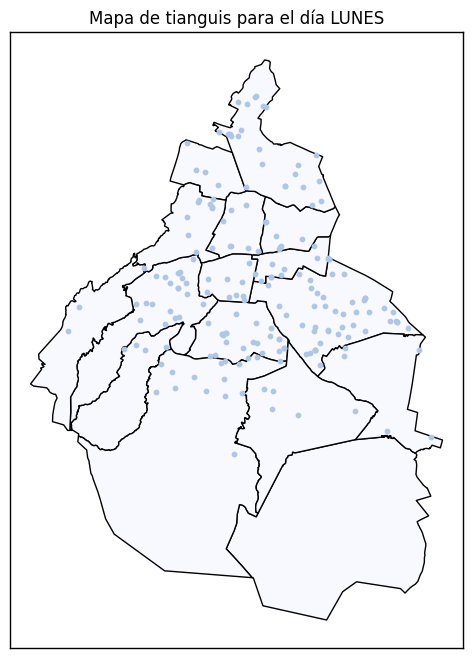

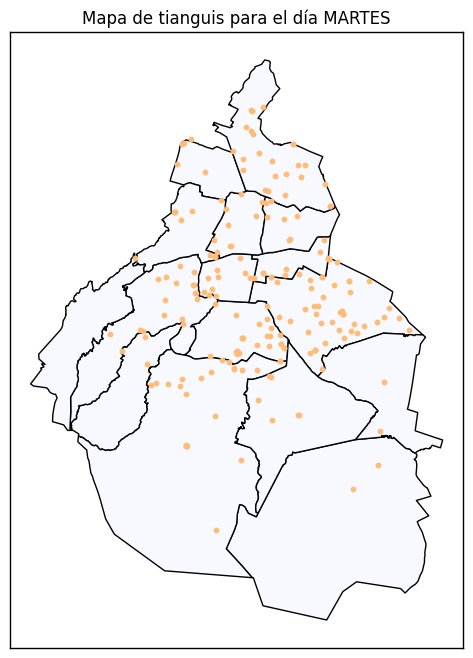

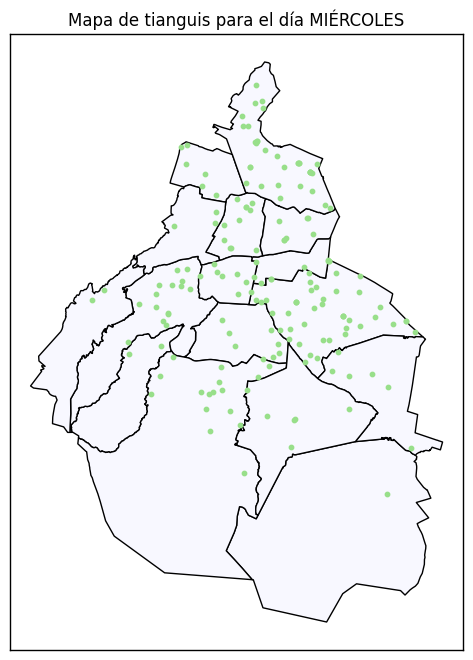

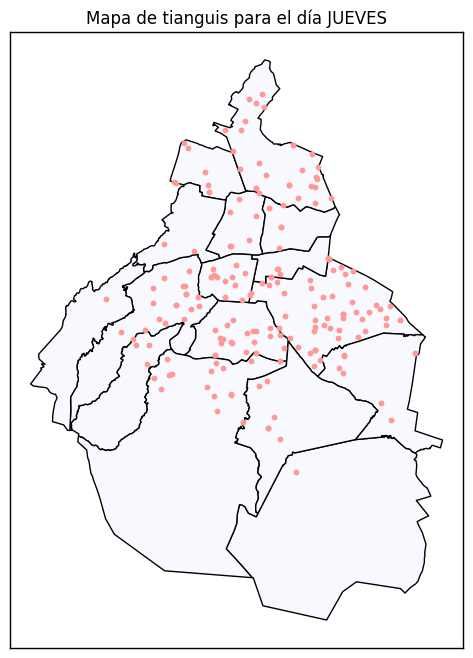

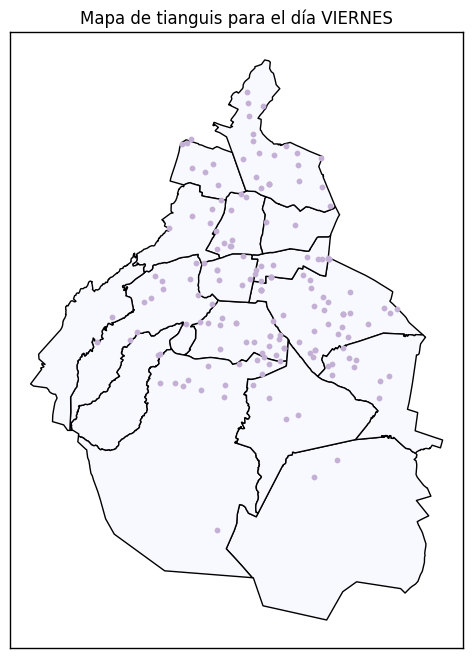

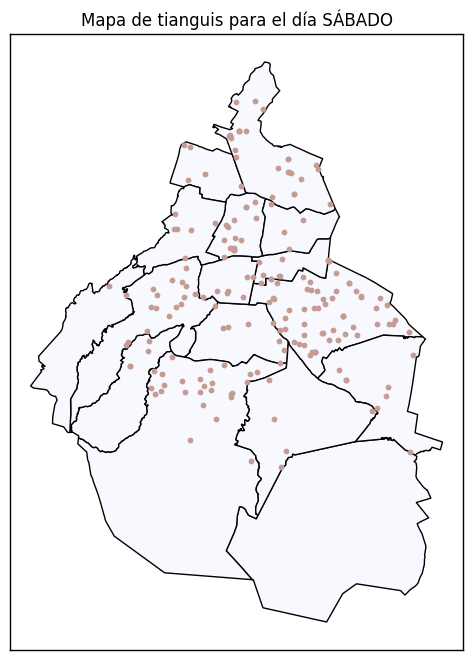

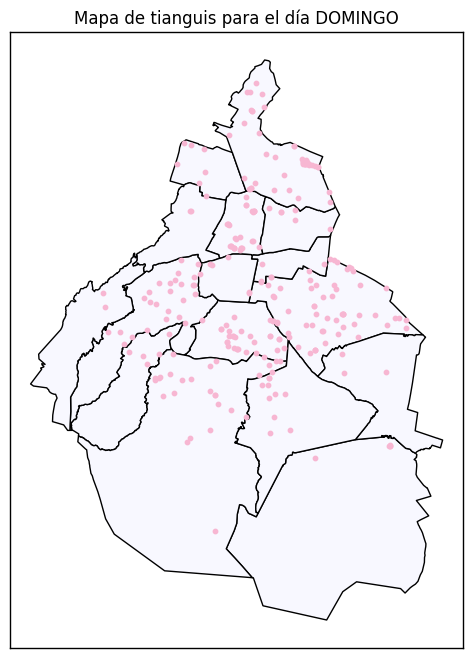

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests

# Crear un diccionario de mapeo de colores para cada día único
colores = {'LUNES': '#AEC7E8', 'MARTES': '#FFBB78', 'MIÉRCOLES': '#98DF8A', 'JUEVES': '#FF9896', 'VIERNES': '#C5B0D5', 'SÁBADO': '#C49C94', 'DOMINGO': '#F7B6D2'}
# Graficar los tianguis utilizando colores basados en el día
tianguis['COLOR'] = tianguis['DÍA'].map(colores)

# Obtener valores únicos de la columna 'DÍA'
dias_unicos = tianguis['DÍA'].unique()

# Iterar sobre los valores únicos de 'DÍA' y crear un mapa para cada uno
for dia in dias_unicos:
    # Filtrar el GeoDataFrame para el día actual
    tianguis_dia = tianguis[tianguis['DÍA'] == dia]
    
    # Crear una figura y ejes sobre el mapa base
    fig, ax = plt.subplots(figsize=(10, 8))  # Tamaño de la figura en pulgadas (ancho, alto)
    
    # Graficar el mapa base
    gdf_entidad.plot(ax=ax, color='#F8F8FF', linestyle='-', edgecolor='black')  # Línea doble con borde negro
    
    # Configurar los spines para que sean visibles y de color negro con un ancho de línea de 1 punto
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1)
    
    # Eliminar las etiquetas de los ejes
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Graficar los tianguis para el día actual
    tianguis_dia.plot(ax=ax, color=colores[dia], markersize=10)  # Por ejemplo, en rojo con marcadores de tamaño 10
    
    # Configurar título
    ax.set_title(f'Mapa de tianguis para el día {dia}')
    
    # Mostrar el mapa
    plt.show()


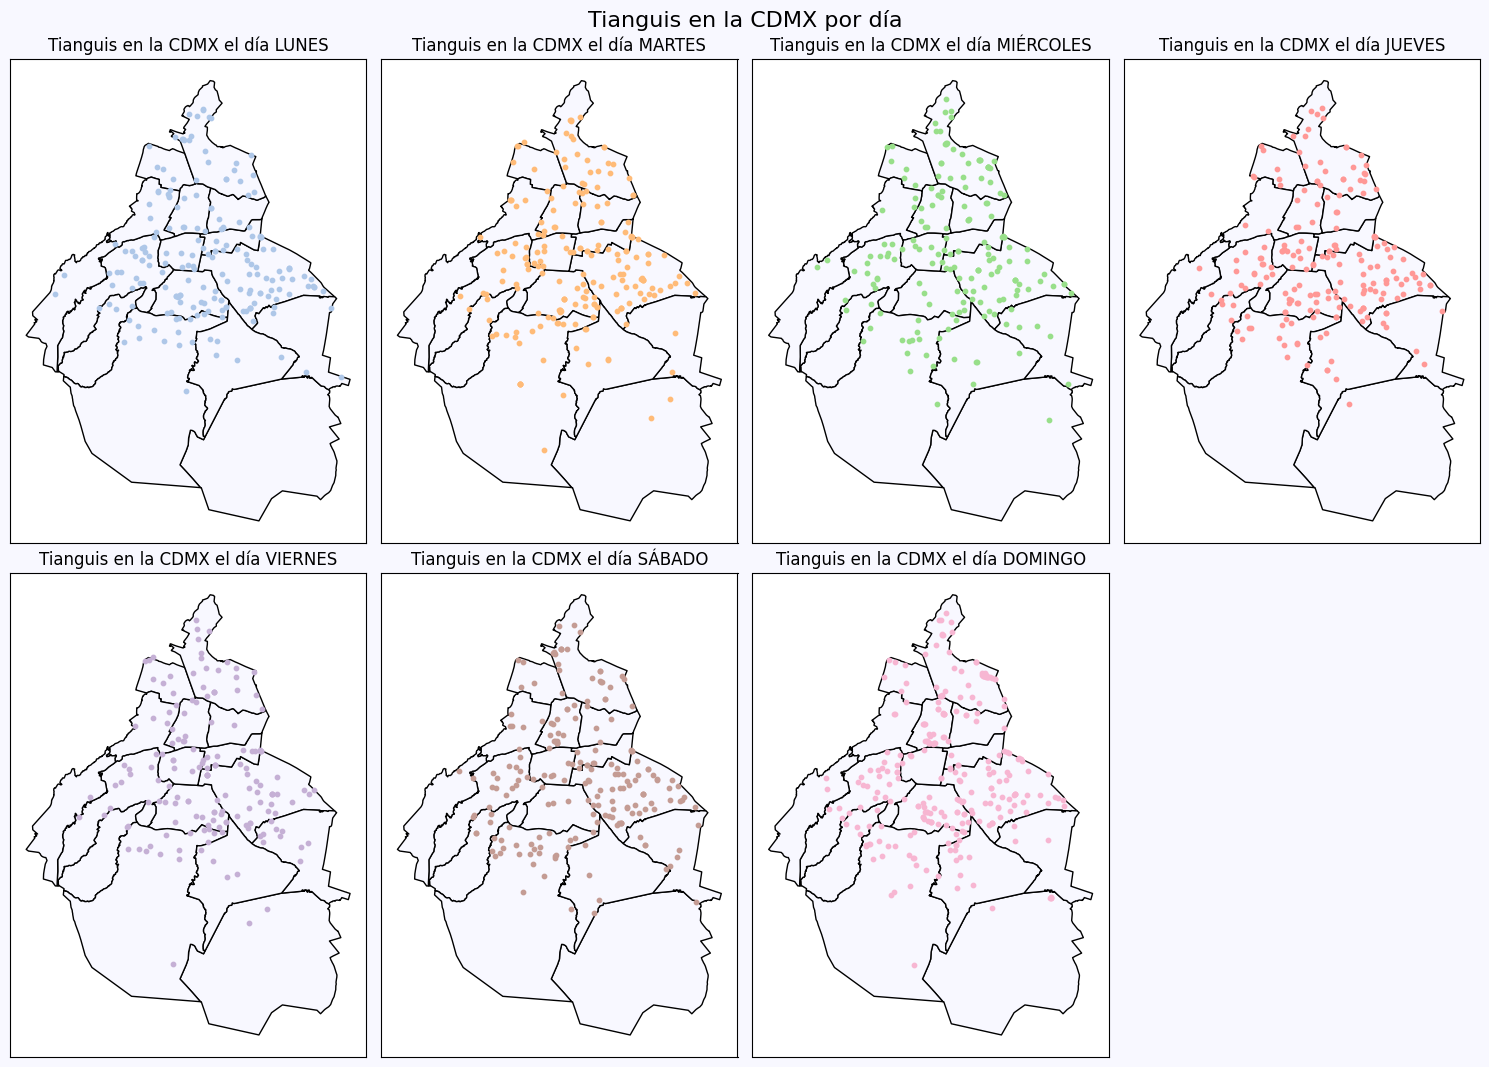

In [40]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests

# Cargar el mapa de la entidad con código "09"
url = "https://gaia.inegi.org.mx/wscatgeo/geo/mgem/09"
response = requests.get(url)
# Obtener el diccionario JSON
json_data = response.json() 
# Construir un GeoDataFrame desde el JSON
gdf_entidad = gpd.GeoDataFrame.from_features(json_data['features'])

# Crear una figura y ejes con un tamaño más grande
fig, axes = plt.subplots(2, 4, figsize=(15, 11))  # Matriz de ejes de 2 filas y 3 columnas

# Establecer color de fondo en toda la figura
fig.set_facecolor('#F8F8FF')

# Agregar título a la figura
fig.suptitle("Tianguis en la CDMX por día", fontsize=16)

# Mapear el GeoDataFrame de la entidad con color y estilo deseados en cada eje
for i, ax in enumerate(axes.flatten()):
    gdf_entidad.plot(ax=ax, color='#F8F8FF', linestyle='-', edgecolor='black')  # Línea doble con borde negro
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Mapa base #{i+1}')

# Ruta al archivo GeoJSON
file_path = "C:/Users/Brandon/Desktop/ubicacin-de-tianguis2.geojson"

# Leer el archivo GeoJSON en un GeoDataFrame
tianguis = gpd.read_file(file_path)
# Reemplazar el valor incorrecto en la columna 'DÍA'
tianguis['DÍA'] = tianguis['DÍA'].str.replace('SÀBADO', 'SÁBADO')

# Obtener valores únicos de la columna 'DÍA'
dias_unicos = tianguis['DÍA'].unique()

# Graficar los tianguis para cada día en ejes separados
for dia, ax in zip(dias_unicos, axes.flatten()):
    # Filtrar el GeoDataFrame para el día actual
    tianguis_dia = tianguis[tianguis['DÍA'] == dia]
    # Graficar los tianguis para el día actual
    tianguis_dia.plot(ax=ax, color=colores[dia], markersize=10)  # Por ejemplo, en rojo con marcadores de tamaño 10
    ax.set_title(f'Tianguis en la CDMX el día {dia}')
    ax.set_xticks([])
    ax.set_yticks([])

# Eliminar los ejes no utilizados
for ax in axes.flatten()[len(dias_unicos):]:
    ax.remove()

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los mapas
plt.show()

